In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 1. 공휴일 교통량 증가할 것이다
## 1) 어느 지역이 교통량 증가하였는가(명동, 서울, 북적대는데)

In [4]:
# data read
data21_3 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통3.xlsx')
data21_2 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통2.cell')
data21_1 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통1.cell')
data12 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통12.cell')
data10 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통10.cell')
data9 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통9.cell')
data_sum = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/대중교통총합.cell')

In [12]:
data21_3 = pd.DataFrame(data21_3)
data21_2 = pd.DataFrame(data21_2)
data21_1 = pd.DataFrame(data21_1)
data12 = pd.DataFrame(data12)
data10 = pd.DataFrame(data10)
data9 = pd.DataFrame(data9)
data_sum = pd.DataFrame(data_sum)
data21_3

,3월,합계
0,2021-03-01(월),1652271
1,2021-03-02(화),3449751
2,2021-03-03(수),3457488
3,2021-03-04(목),3442007
4,2021-03-05(금),3610673
5,2021-03-06(토),2569663
6,2021-03-07(일),1977870
7,2021-03-08(월),3416982
8,2021-03-09(화),3452756
9,2021-03-10(수),3487586


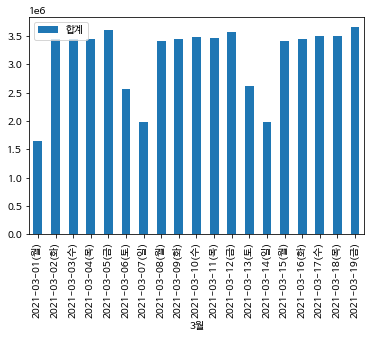

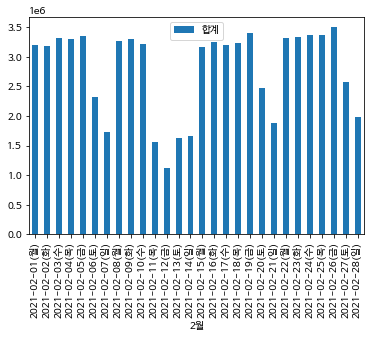

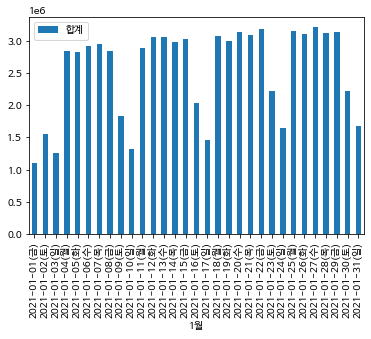

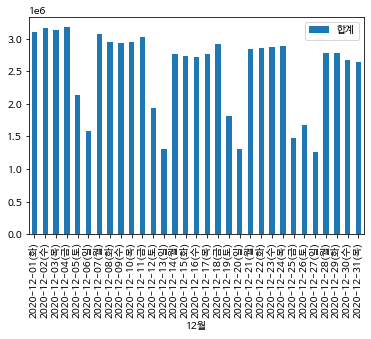

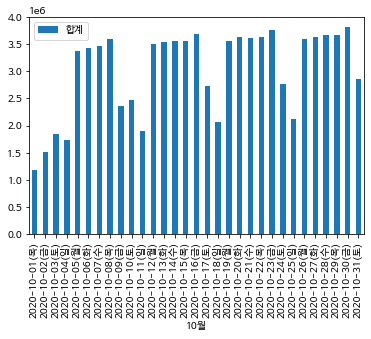

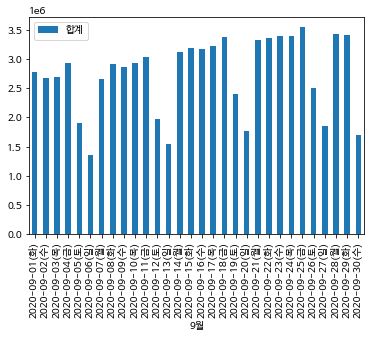

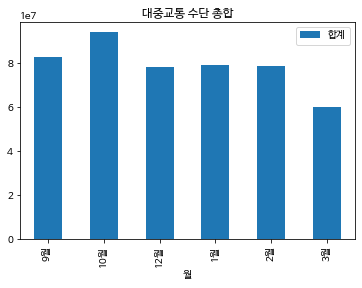

In [6]:
data21_3.plot.bar(x='3월',y='합계')
data21_2.plot.bar(x='2월',y='합계')
data21_1.plot.bar(x='1월',y='합계')
data12.plot.bar(x='12월',y='합계')
data10.plot.bar(x='10월',y='합계')
data9.plot.bar(x='9월',y='합계')
data_sum.plot.bar(x='월',y='합계', title = '대중교통 수단 총합')

# 대중교통 총합

In [32]:
data_sum

,월,합계
0,9월,82381417
1,10월,93797406
2,12월,78171813
3,1월,78897435
4,2월,78279202
5,3월,59697657


# 특정 지역 공휴일_대중교통 현황

In [7]:
# data read
data = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/서울 공휴일 지하철.xlsx')
#http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

In [8]:
data = pd.DataFrame(data)
data

,일,호선,역,승차,하차,이용
0,20201224,경의선,서강대,1640,1484,NaN
1,20201224,중앙선,지평,25,22,NaN
2,20201224,중앙선,용문,1022,1152,NaN
3,20201224,중앙선,원덕,208,223,NaN
4,20201224,중앙선,양평,1795,1817,NaN
...,...,...,...,...,...,...
1783,20201226,경부선,송탄,2582,2371,NaN
1784,20201226,경부선,서정리,3672,3067,NaN
1785,20201226,경부선,지제,1533,1297,NaN
1786,20201226,경부선,평택,6870,6731,NaN


In [18]:
data24 = data.iloc[:596, :]
data25 = data.iloc[597:1194, :]
data26 = data.iloc[1195:, :]
data24 = pd.DataFrame(data24)
data25 = pd.DataFrame(data25)
data26 = pd.DataFrame(data26)

In [19]:
data24['이용'] = data24['승차'] + data24['하차']
data25['이용'] = data25['승차'] + data25['하차']
data26['이용'] = data26['승차'] + data26['하차']
data24_max = data24.sort_values('이용', ascending = False).head(20)
data25_max = data25.sort_values('이용', ascending = False).head(20)
data26_max = data26.sort_values('이용', ascending = False).head(20)

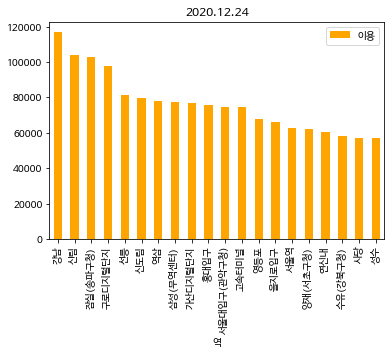

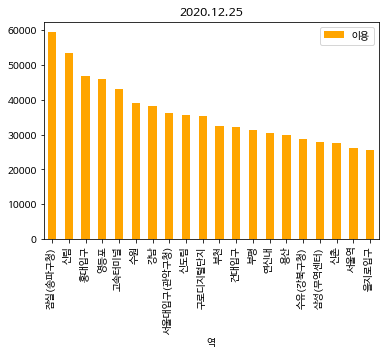

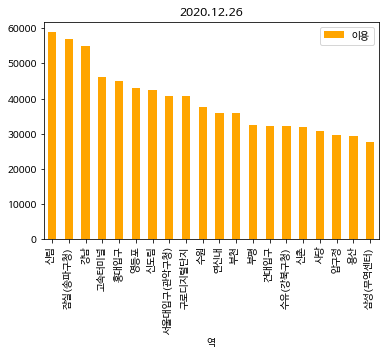

In [28]:
data24_max.plot.bar(x='역',y='이용', title = '2020.12.24', color = 'orange')
data25_max.plot.bar(x='역',y='이용', title = '2020.12.25', color = 'orange')
data26_max.plot.bar(x='역',y='이용', title = '2020.12.26', color = 'orange')

# 1. 공휴일 교통량 증가할 것이다
## 2) 코로나로 인해 대중교통 이용률은 감소할 것이다
### 지하철만 다소 감소

In [34]:
# data read
data2019 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/교통수단.xlsx')
data2020 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/교통수단1.xlsx')
data2019 = pd.DataFrame(data2019)
data2020 = pd.DataFrame(data2020)

Text(0, 0.5, '운행수 % ')

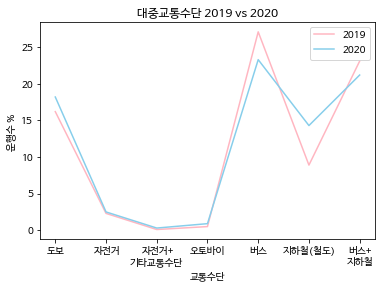

In [35]:
plt.plot(data2019.values[:,0], data2019.values[:,1], label = '2019', color = 'lightpink')
plt.plot(data2020.values[:,0], data2020.values[:,1], label = '2020' , color = 'skyblue')
plt.legend(loc = 'best')
plt.title('대중교통수단 2019 vs 2020')
plt.xlabel("교통수단")
plt.ylabel('운행수 % ')

# 1. 공휴일 교통량 증가할 것이다
## 3) 차 교통량이 증가할 것이다


In [54]:
data21_2 = pd.read_csv('/content/drive/MyDrive/kaggle/교통빅데이터/차 이용량.csv', encoding = 'cp949')
data12 = pd.read_csv('/content/drive/MyDrive/kaggle/교통빅데이터/차12.csv', encoding = 'cp949')
data10 = pd.read_csv('/content/drive/MyDrive/kaggle/교통빅데이터/차10.csv', encoding = 'cp949')
data99 = pd.read_csv('/content/drive/MyDrive/kaggle/교통빅데이터/차9.csv', encoding = 'cp949')

In [55]:
car21_2 = data21_2.groupby(data21_2['집계일자']).sum()['총교통량']
car21_2 = pd.DataFrame(car21_2)
car12 = data12.groupby(data12['집계일자']).sum()['총교통량']
car12 = pd.DataFrame(car12)
car10 = data10.groupby(data10['집계일자']).sum()['총교통량']
car10 = pd.DataFrame(car10)
car99 = data99.groupby(data99['집계일자']).sum()['총교통량']
car99 = pd.DataFrame(car99)

### 20200930~20201003 추석 다소 감소

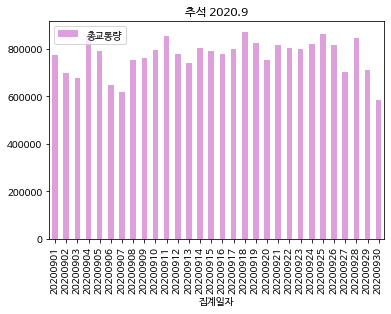

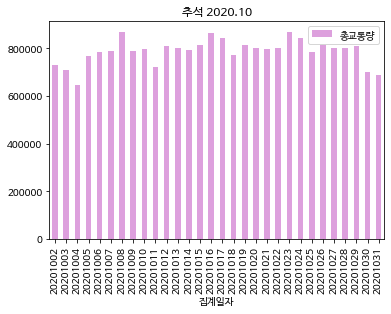

In [49]:
car99.plot(kind = 'bar',title = '추석 2020.9',color = 'plum')
car10.plot(kind = 'bar',title = '추석 2020.10',color = 'plum')

### 20201225 감소 (주말마다 감소추세를 보이는데 크리스마스는 금요일인데 감소)

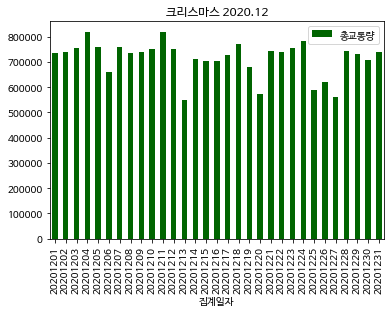

In [51]:
car12.plot(kind = 'bar',title = '크리스마스 2020.12',color = 'darkgreen')

### 20210211~20210213 (목금토 다소 감소) (일요일 항상 감소)

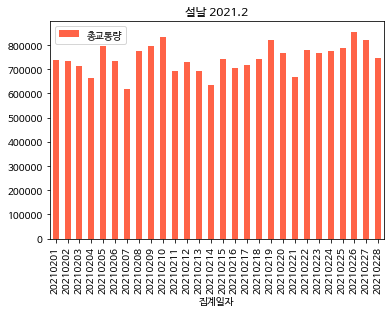

In [53]:
car21_2.plot(kind = 'bar', title = '설날 2021.2', color = 'tomato')

# 1. 공휴일 교통량 증가할 것이다
### - 식당 매출업과 비교, 똑같이 증가했는지! (월단위로 분석..)

In [57]:
# data read
dataf = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/소매및음식.xlsx')

In [58]:
dataf = pd.DataFrame(dataf)
dataf

,년도,음식점포함소매판매액지수,소매판매액지수,음식점및주점업
0,2019. 01,107.1,109.8,97.1
1,2019. 02,97.0,99.8,86.4
2,2019. 03,111.6,116.0,95.1
3,2020. 01,108.0,111.6,94.7
4,2020. 02,93.0,97.7,75.4
5,2020. 03,98.7,107.0,67.7
6,2021. 01,101.0,111.6,61.3
7,2021. 02,97.6,105.9,66.5


Text(0, 0.5, '불변지수')

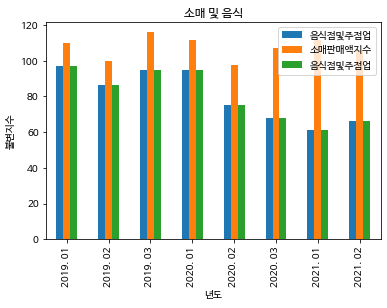

In [59]:
dataf.plot(kind = 'bar', x = '년도', y = ['음식점및주점업','소매판매액지수','음식점및주점업'])
plt.legend(loc = 'best')
plt.title('소매 및 음식')
plt.ylabel('불변지수')

# 1. 공휴일 교통량 증가할 것이다
### - 항공기의 이용률이 감소할 것이다 (국토교통이 아니라 보류..)
#### 10월 11일에는 증가

In [60]:
# data read
data2019 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/항공사2019.xlsx')
data2020 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/항공사2020.xlsx')

In [61]:
data2019 = pd.DataFrame(data2019)
data2020 = pd.DataFrame(data2020)

In [62]:
data2019

,월,운항
0,9월,15725
1,10월,16836
2,11월,16211
3,12월,16468
4,1월,16480
5,2월,12815


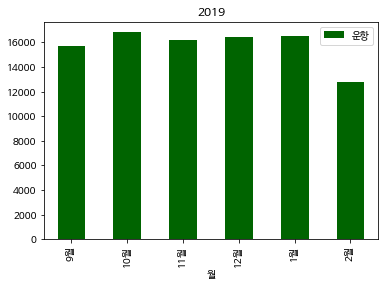

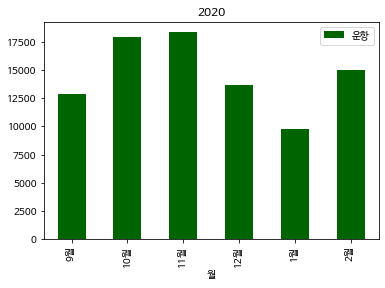

In [63]:
data2019.plot.bar(x='월',y='운항',title = '2019', color = 'darkgreen')
data2020.plot.bar(x='월',y='운항',title = '2020', color = 'darkgreen')

Text(0, 0.5, '운행수')

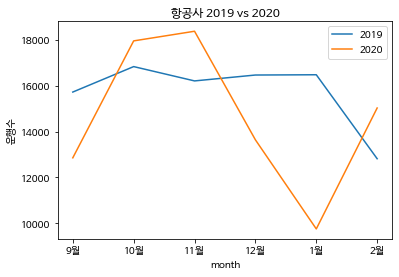

In [64]:
plt.plot(data2019.values[:,0], data2019.values[:,1], label = '2019')
plt.plot(data2020.values[:,0], data2020.values[:,1], label = '2020')
plt.legend(loc = 'best')
plt.title('항공사 2019 vs 2020')
plt.xlabel("month")
plt.ylabel('운행수')